# 01. PyTorch Workflow Fundamentals

In this module we're going to cover a standard PyTorch workflow (it can be chopped and changed as necessary but it covers the main outline of steps).
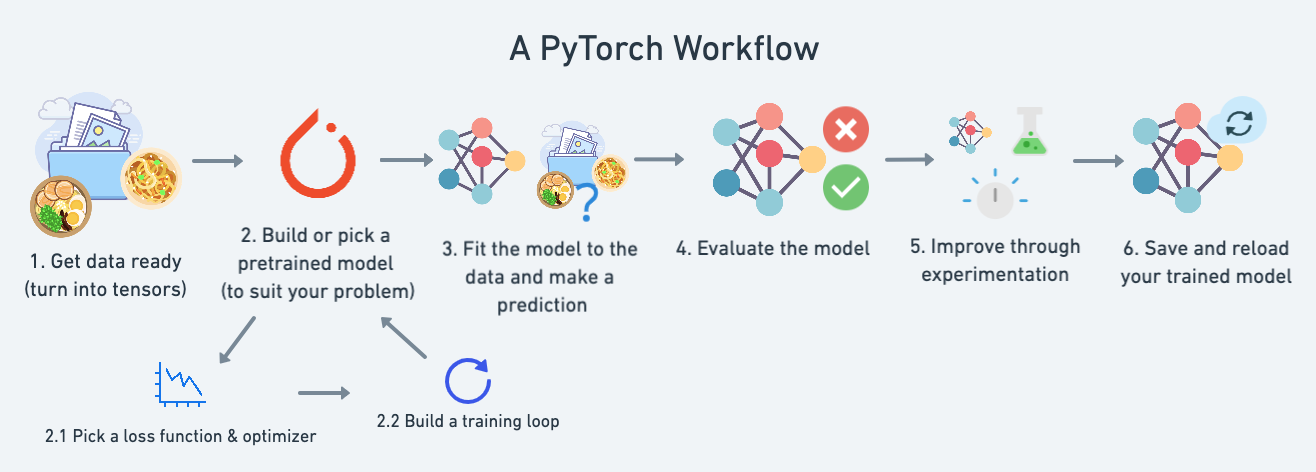

For now, we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.
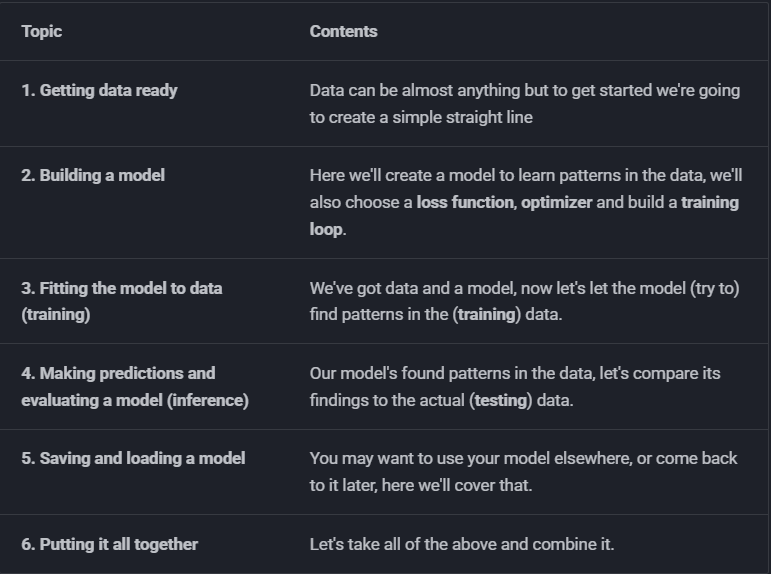

We're going to get `torch`, `torch.nn` (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and `matplotlib`.

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.0+cu126'

## 1. Data (preparing and loading)
I want to stress that "data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more.
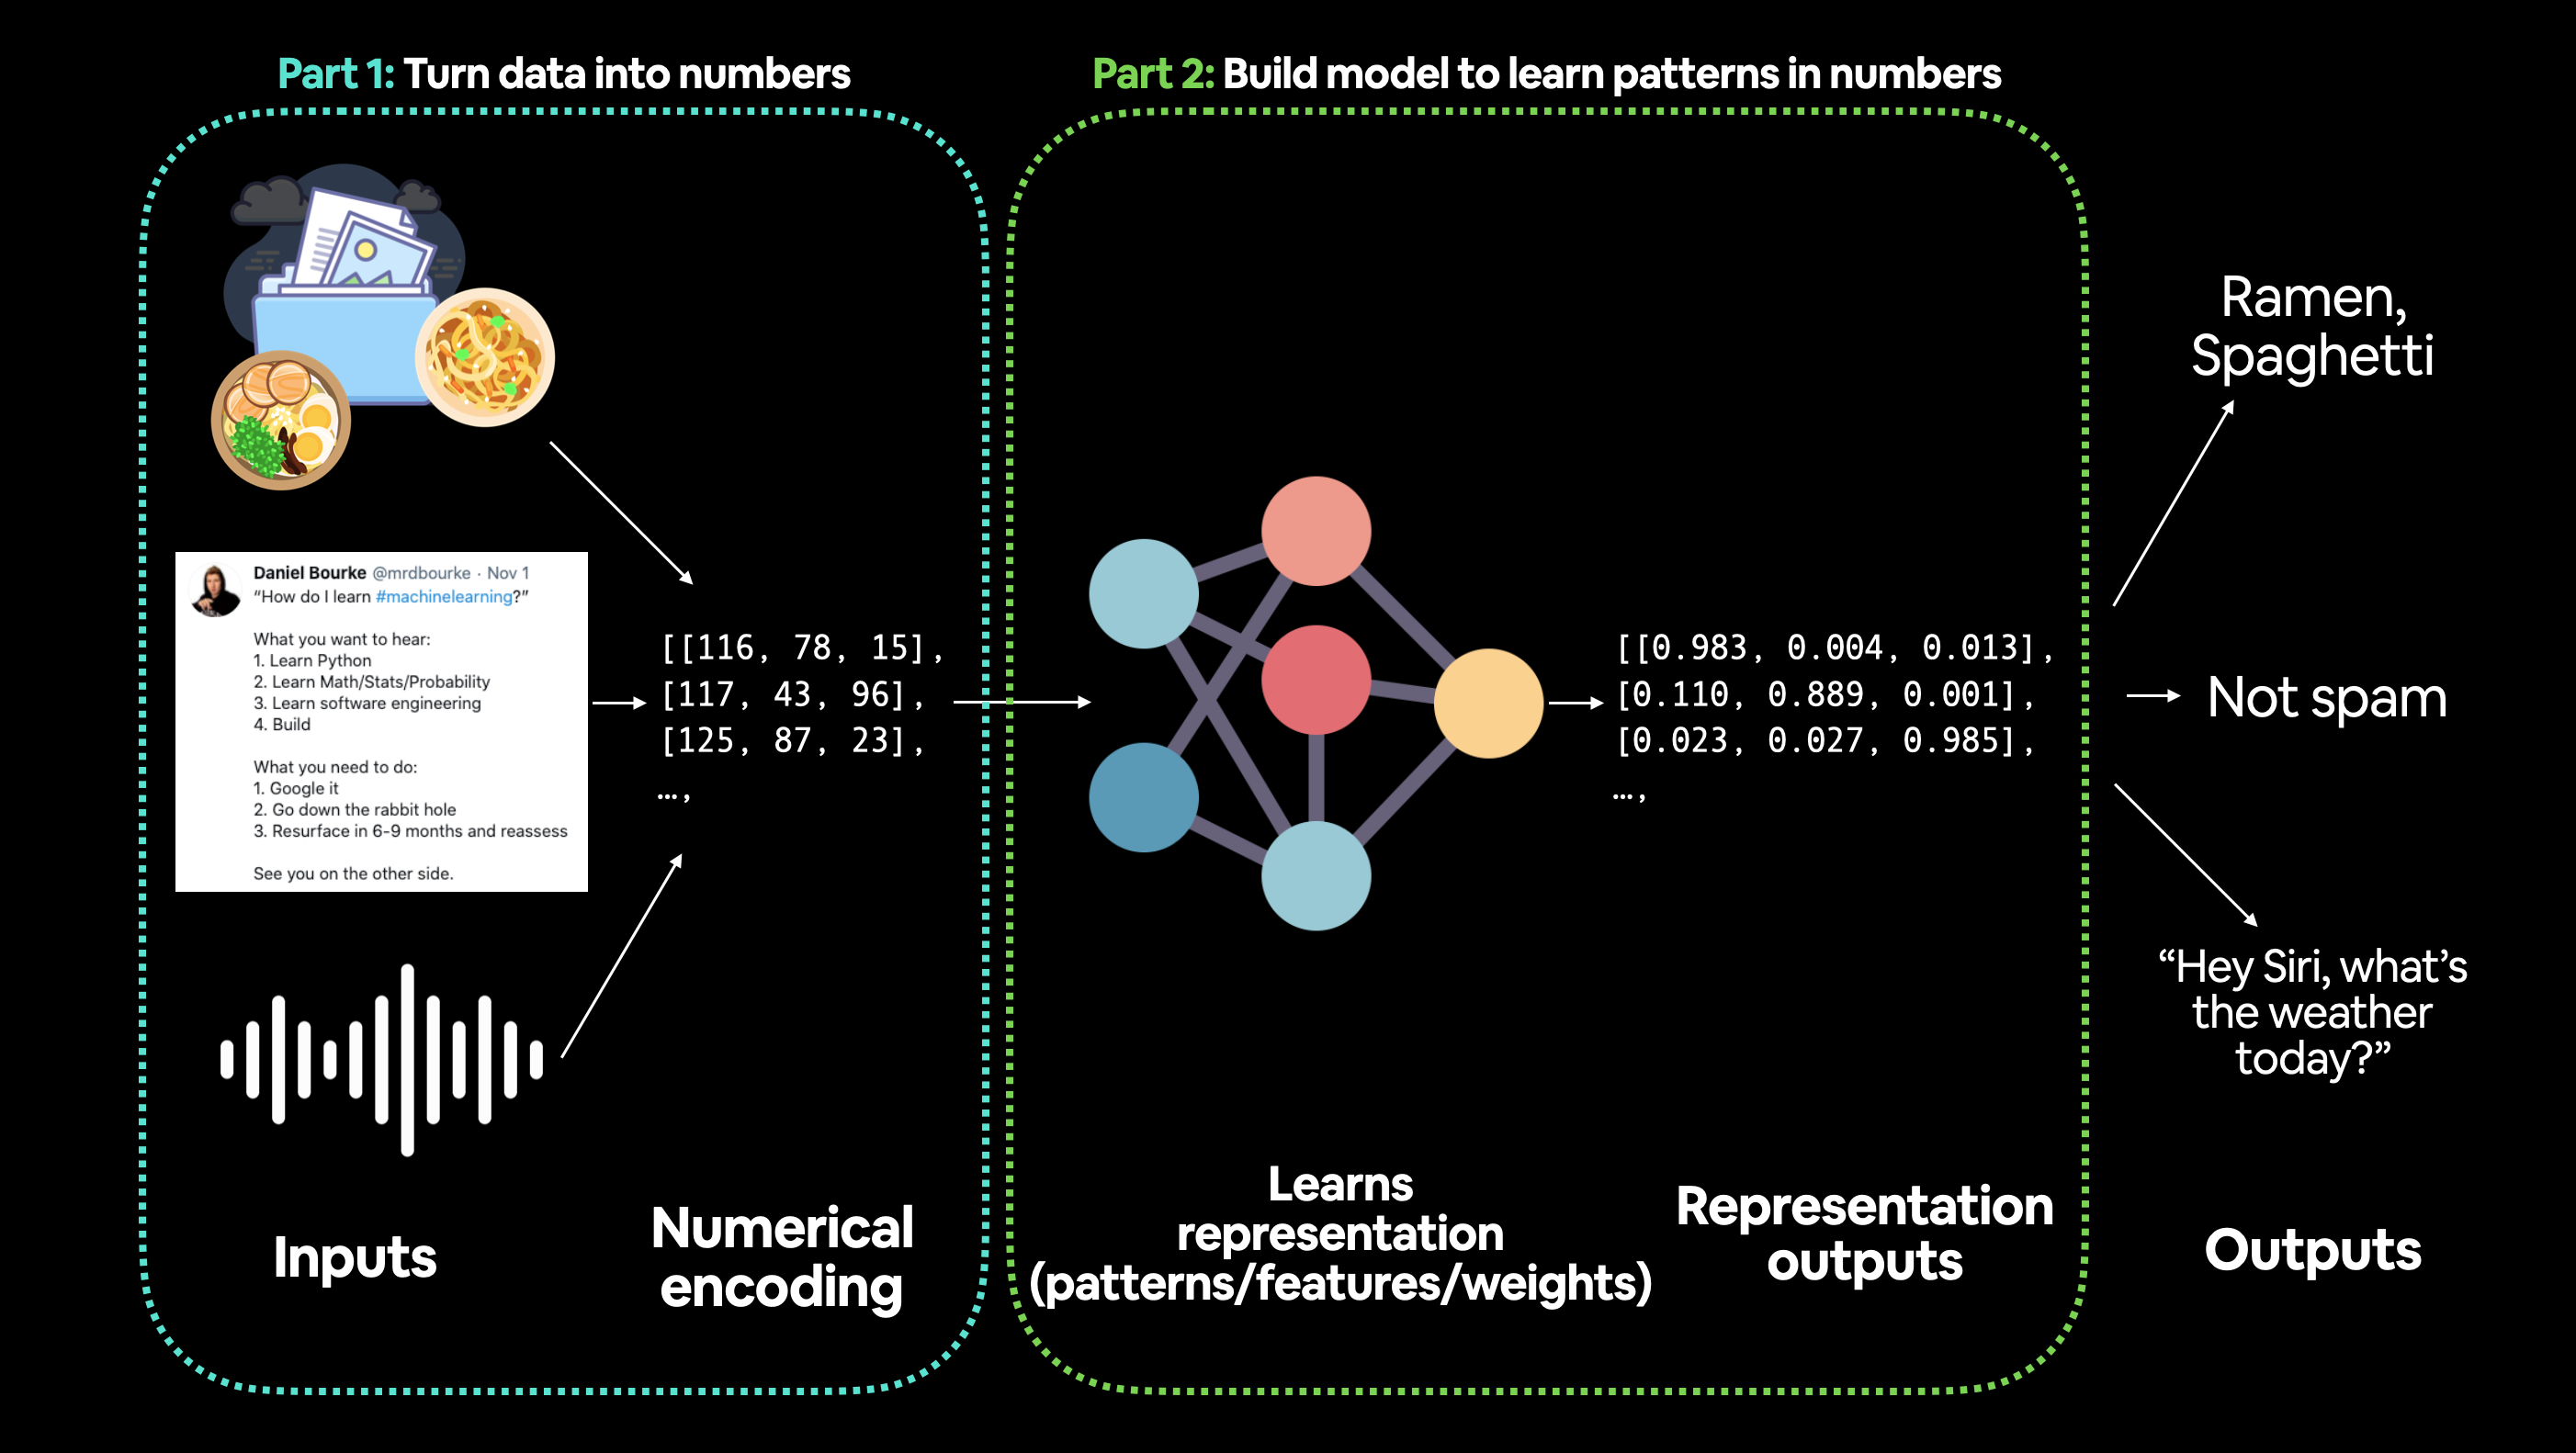
Machine learning is a game of two parts:

- Turn your data, whatever it is, into numbers (a representation).
- Pick or build a model to learn the representation as best as possible.
Sometimes one and two can be done at the same time.

But what if you don't have data?

Well, that's where we're at now.

No data.

But we can create some.

Let's create our data as a straight line.

We'll use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

In [2]:
# create known parameters
weight = 0.7
bias = 0.3

#create data

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

Beautiful! Now we're going to move towards building a model that can learn the relationship between `X` (features) and `y` (labels).

### Split data into training and test sets
We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose:
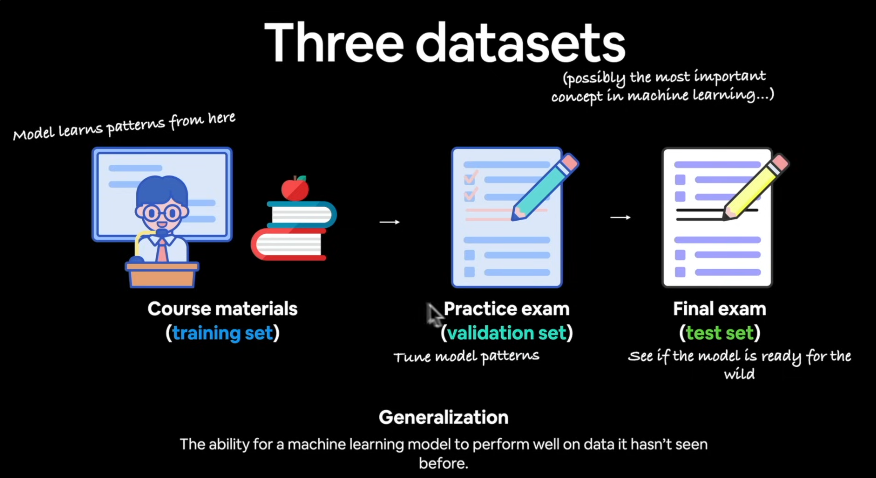

lets say you are trying to learn something through a course.
- So the training set is the material. This is where our model learns patterns from.
- Then you have a practice exam. This is where our model gets tuned on (the hyperparameters get tuned on this dataset).
- Finally, there's the final exam. This is where our model gets evaluated on completely unseen examples.


| Split           | Purpose                                                                 | Amount of total data | How often is it used?       |
|----------------|-------------------------------------------------------------------------|----------------------|-----------------------------|
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60–80%              | Always                      |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10–20%              | Often but not always        |
| **Testing set**  | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10–20%              | Always                      |


For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` tensors.

**Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn from training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [3]:
# create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

#### *EXPLANATION*

This code is doing a train/test split—a standard preprocessing step in machine learning to evaluate model performance. You divide the data into:

- Training set: for teaching the model
- Testing set: for evaluating how well the model generalizes

Assumptions
- `X` is your features (inputs to the model, e.g., images, text, tabular data).
- `y` is your labels (outputs or targets you want the model to predict).

They are usually NumPy arrays or Python lists, and both are the same length.

- `len(X)` gives the **total number of data samples**.
- `0.8 * len(X)` computes 80% of the total data.
- `int(...)` converts that floating-point result into an integer (because you can't split at a fraction of an index).
- `train_split` stores the **index position** that will act as the cutoff between training and testing data.


In [6]:
x_train, y_train = X[:train_split], y[:train_split]

`X[:train_split]` slices the first 80% of `X`, assigning it to `x_train` (training features).
`y[:train_split]` slices the first 80% of `y`, assigning it to `y_train` (training labels).

**This is your training data.**

In [7]:
x_test, y_test = X[train_split:], y[train_split:]

- `X[train_split:]` slices the **remaining 20%** of `X`, assigning it to `x_test` (testing features).
- `y[train_split:]` does the same for labels, assigning it to `y_test`.

This is **your testing data**.


In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

This returns the sizes of each dataset to confirm the split:

`len(x_train)` should be 80% of the total samples
`len(x_test)` should be 20%

The same applies for `y_train` and `y_test`

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)


Wonderful, we've got 40 samples for training (`X_train` & `y_train`) and 10 samples for testing (`X_test` & `y_test`).

The model we create is going to try and learn the relationship between `X_train` & `y_train` and then we will evaluate what it learns on `X_test` and `y_test`.

But right now our data is just numbers on a page.

Let's create a function to visualize it.

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14});

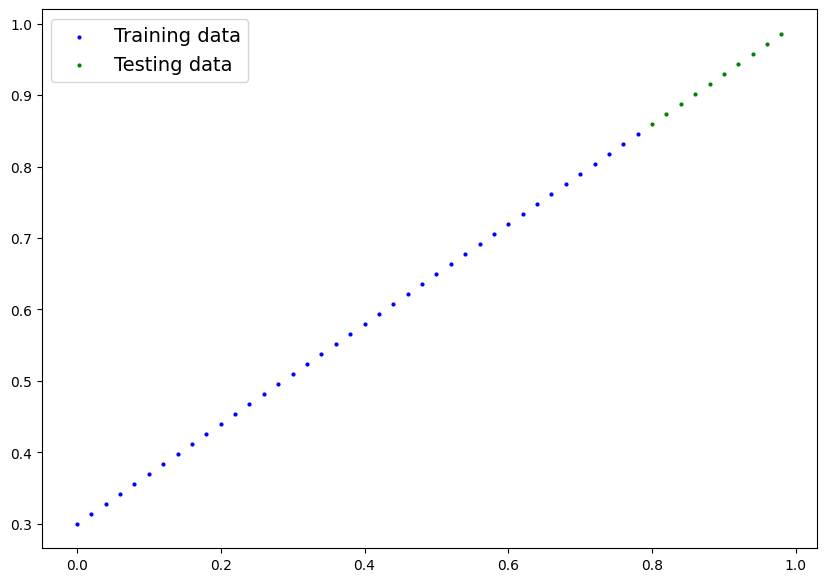

In [6]:
plot_predictions();

#### Explanation of `plot_predictions` Function

This function visualizes training data, testing data, and predicted results from a model. It's particularly useful for simple regression or classification tasks where you can plot the data points in 2D.


In [9]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    return None

- `train_data`: Feature data used to train the model (`default = X_train`)
- `train_labels`: Labels corresponding to the training data (`default = y_train`)
- `test_data`: Feature data used to test the model (`default = X_test`)
- `test_labels`: Labels for the test data (`default = y_test`)
- `predictions`: Optional predictions made by the model on the test data

**Step 1: Create the Plot Canvas**

`plt.figure(figsize=(10, 7))`

- Initializes a new figure for plotting.
- Sets the figure size to 10 inches wide by 7 inches tall.

**Step 2: Plot the Training Data**

`plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
`
- Plots training data points in blue ("`b`").
- `s=4` sets the size of each point.
- `label` is used for the legend.

**Step 3: Plot the Testing Data**

`plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")`
- Plots test data points in green ("`g`").
-Same point size and label concept.

**Step 4: Plot the Predictions (If Provided)**

`if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")`

If the model predictions are available:
Plots them in red ("`r`").
These are the model's outputs for the test data, which can then be visually compared to the actual test labels (green points).

**Step 5: Display the Legend**

`plt.legend(prop={"size": 14})`

Displays a legend to identify blue (training), green (testing), and red (predictions).
Sets the legend font size to 14 for readability.


## 2. Build model

Now we've got some data, let's build a model to use the blue dots to predict the green dots.
Let's replicate a standard linear regression model using pure PyTorch.


Alright there's a fair bit going on above but let's break it down bit by bit.

**Resource**: We'll be using Python classes **to create bits and pieces for building neural networks. If you're unfamiliar with Python class notation, I'd recommend reading [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/) a few times.